In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [3]:
path = r"/content/drive/MyDrive/dataset.csv"
df = pd.read_csv(path)

In [4]:
df.head()

VIN (1-10)     County      City State  Postal Code  Model Year       Make  \
0  JTMEB3FV6N     Monroe  Key West    FL        33040        2022     TOYOTA   
1  1G1RD6E45D      Clark  Laughlin    NV        89029        2013  CHEVROLET   
2  JN1AZ0CP8B     Yakima    Yakima    WA        98901        2011     NISSAN   
3  1G1FW6S08H     Skagit  Concrete    WA        98237        2017  CHEVROLET   
4  3FA6P0SU1K  Snohomish   Everett    WA        98201        2019       FORD   

        Model                   Electric Vehicle Type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
2        LEAF          Battery Electric Vehicle (BEV)   
3     BOLT EV          Battery Electric Vehicle (BEV)   
4      FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible              42   
1           Clean Alternative Fuel Vehicle Eligible              38   
2           Clean Alternative Fuel Vehicle Eligible              73   
3           Clean Alternative Fuel Vehicle Eligible             238   
4             Not eligible due to low battery range              26   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                   NaN       198968248   
1          0                   NaN         5204412   
2          0                  15.0       218972519   
3          0                  39.0       186750406   
4          0                  38.0         2006714   

              Vehicle Location        Electric Utility  2020 Census Tract  
0    POINT (-81.80023 24.5545)                     NaN        12087972100  
1  POINT (-114.57245 35.16815)                     NaN        32003005702  
2  POINT (-120.50721 46.60448)              PACIFICORP        53077001602  
3   POINT (-121.7515 48.53892)  PUGET SOUND ENERGY INC        53057951101  
4  POINT (-122.20596 47.97659)  PUGET SOUND ENERGY INC        53061041500

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [6]:
# Columns in the DataFrame :

df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [7]:
# Companies which made the Electric Vehicles :
print("Companies which made the Electric Vehicles :  \n",df['Make'].unique(),end='\n')

Companies which made the Electric Vehicles :  
 ['TOYOTA' 'CHEVROLET' 'NISSAN' 'FORD' 'TESLA' 'KIA' 'AUDI' 'FIAT' 'BMW'
 'PORSCHE' 'CADILLAC' 'HONDA' 'MITSUBISHI' 'CHRYSLER' 'RIVIAN' 'HYUNDAI'
 'VOLVO' 'VOLKSWAGEN' 'MERCEDES-BENZ' 'JEEP' 'MINI' 'SMART' 'SUBARU'
 'POLESTAR' 'LUCID MOTORS' 'LINCOLN' 'JAGUAR' 'FISKER' 'LAND ROVER'
 'LEXUS' 'TH!NK' 'GENESIS' 'BENTLEY' 'AZURE DYNAMICS']


In [8]:
# The different types of Electric Vehicles manufactured are :
print("The different types of Electric Vehicles manufactured are:  \n",df['Electric Vehicle Type'].unique(),end='\n\n')

The different types of Electric Vehicles manufactured are:  
 ['Plug-in Hybrid Electric Vehicle (PHEV)' 'Battery Electric Vehicle (BEV)']



In [9]:
df.rename(columns={'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 'CAFV'}, inplace=True)
# rename col Electric Vehicle Type -> EV Type
df.rename(columns={'Electric Vehicle Type': 'EV Type'}, inplace=True)

In [10]:
# To calculate the mean, standard deviation, percentiles and other basic statistics:
df.describe().T

count          mean           std           min  \
Postal Code           112634.0  9.815623e+04  2.648733e+03  1.730000e+03   
Model Year            112634.0  2.019003e+03  2.892364e+00  1.997000e+03   
Electric Range        112634.0  8.781299e+01  1.023342e+02  0.000000e+00   
Base MSRP             112634.0  1.793440e+03  1.078375e+04  0.000000e+00   
Legislative District  112348.0  2.980560e+01  1.470055e+01  1.000000e+00   
DOL Vehicle ID        112634.0  1.994567e+08  9.398427e+07  4.777000e+03   
2020 Census Tract     112634.0  5.296650e+10  1.699104e+09  1.101001e+09   

                               25%           50%           75%           max  
Postal Code           9.805200e+04  9.811900e+04  9.837000e+04  9.970100e+04  
Model Year            2.017000e+03  2.020000e+03  2.022000e+03  2.023000e+03  
Electric Range        0.000000e+00  3.200000e+01  2.080000e+02  3.370000e+02  
Base MSRP             0.000000e+00  0.000000e+00  0.000000e+00  8.450000e+05  
Legislative District  1.800000e+01  3.400000e+01  4.300000e+01  4.900000e+01  
DOL Vehicle ID        1.484142e+08  1.923896e+08  2.191899e+08  4.792548e+08  
2020 Census Tract     5.303301e+10  5.303303e+10  5.305307e+10  5.603300e+10

In [11]:
# Checking for duplicate records :
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
112629    False
112630    False
112631    False
112632    False
112633    False
Length: 112634, dtype: bool

In [12]:
# Count of Duplicate Records in the Entire Dataset :
df.duplicated().sum()

0

As displayed above, our dataframe has no Duplicates.

In [13]:
# To check null values count (if present) in each column :
df.isnull().sum()

VIN (1-10)                0
County                    0
City                      0
State                     0
Postal Code               0
Model Year                0
Make                      0
Model                    20
EV Type                   0
CAFV                      0
Electric Range            0
Base MSRP                 0
Legislative District    286
DOL Vehicle ID            0
Vehicle Location         24
Electric Utility        443
2020 Census Tract         0
dtype: int64

From the above table, it can be seen that null values present in :

- "Model" column are 20
- "Legislative District" are 286
- "Vehicle Location" are 24
- "Electric Utility" are 443

In [14]:
tmpdf = df.copy()

In [15]:
# columns that won't be needed
TO_BE_DROPPED = [
    'VIN (1-10)',           # some sort of uid
    'Legislative District', # legislative district code, depends on state
    'DOL Vehicle ID',       # again, some sort of uid
    '2020 Census Tract',    # census tract code
    'Electric Utility'      # won't use
]
df.drop(columns=TO_BE_DROPPED, inplace=True)

In [16]:
# Checking if Dataframe contains anymore null values :
df.isnull().sum()

County               0
City                 0
State                0
Postal Code          0
Model Year           0
Make                 0
Model               20
EV Type              0
CAFV                 0
Electric Range       0
Base MSRP            0
Vehicle Location    24
dtype: int64

In [17]:
#Imputing null values with mode
df['Vehicle Location'].fillna('Unknown', inplace=True)
df["Model"]=df.groupby(["Make"])['Model'].transform(lambda x: x.fillna(x.mode()[0]))

In [18]:
# Checking if Dataframe contains anymore null values :
df.isnull().sum()

County              0
City                0
State               0
Postal Code         0
Model Year          0
Make                0
Model               0
EV Type             0
CAFV                0
Electric Range      0
Base MSRP           0
Vehicle Location    0
dtype: int64

# **Task 1 - Apply Exploratory Data Analysis(Univariate and Bivariate) using 'plotly.express' library :-**


# **1. Univariate Analysis :**

In [19]:
(df['Base MSRP'] <= 0).sum()

109122

In [20]:
df['Model Year'].unique()

array([2022, 2013, 2011, 2017, 2019, 2018, 2016, 2020, 2021, 2015, 2014,
       2012, 2023, 2010, 2008, 2000, 1997, 1999, 1998, 2002])

In [21]:
df['EV Type'].unique()

array(['Plug-in Hybrid Electric Vehicle (PHEV)',
       'Battery Electric Vehicle (BEV)'], dtype=object)

In [22]:
df['EV Type'] = df['EV Type'].replace({
    'Battery Electric Vehicle (BEV)': 'Battery EV',
    'Plug-in Hybrid Electric Vehicle (PHEV)': 'Plug-in Hybrid EV'
})

In [23]:
df['CAFV'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

In [24]:
df['CAFV'] = df['CAFV'].replace({'Clean Alternative Fuel Vehicle Eligible': 'Eligible',
                                  'Not eligible due to low battery range': 'Not Eligible',
                                  'Eligibility unknown as battery range has not been researched': 'Unknown'})

In [25]:
# Top 5 popular Automobile companies preferred :
top_5_companies = df['Make'].value_counts().head(5)
print("Top 5 popular Automobile companies preferred:\n", top_5_companies)

Top 5 popular Automobile companies preferred:
 Make
TESLA        52078
NISSAN       12880
CHEVROLET    10182
FORD          5819
BMW           4680
Name: count, dtype: int64


In [26]:
fig = px.bar(top_5_companies,
             x=top_5_companies.index,  # Use the index (Make values) for x-axis
             y=top_5_companies.values, # Use the values (counts) for y-axis
             title='Top 5 popular Automobile companies preferred : ')
fig.show()

In [28]:
# Types Electric vehicles available are :
EVType_count = df['EV Type'].value_counts()
fig = px.pie(EVType_count, names=EVType_count.index, values=EVType_count.values, title='Types Electric vehicles available are :')
fig.show()

The pie chart plot illustrates that there are two types of Electric Vehicles.They are :
 - Battery Electric Vehicle (BEV)
 - Plug-In Hybrid Electric Vehicle (PHEV)

In detail, BEVs are found more by 76.4% followed by PHEVs with 23.6%.

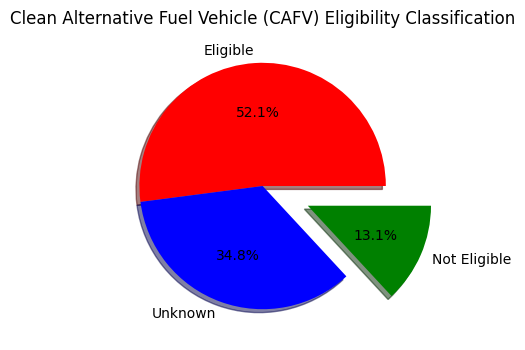

In [30]:
# Clean Alternative Fuel Vehicle (CAFV) Eligibility Classification :

plt.figure(figsize=(6,4))
plt.pie(df['CAFV'].value_counts().values, labels=df['CAFV'].value_counts().index, colors=['Red', 'Blue','Green'], autopct='%1.1f%%', explode=(0,0,0.4),shadow=True)
plt.title('Clean Alternative Fuel Vehicle (CAFV) Eligibility Classification')
plt.show()

In [31]:
# Electric Vehicle Model release years:
fig = px.box(df, y='Model Year', title="Electric Vehicle Model release years")
fig.show()

Insights :

- The above picture contains a Box plot illustrating Electric car models released in each year.
- From the above graph we can see that, up until 2010 they were very few Electric Vehicles released.
- Box plot shows that from 2016-2022 more Electric car models were released.

# **Bivariate Analysis :**

In [32]:
# Clean Alternative Fuel Vehicle(CAFV) Eligibility electric vehicle w.r.t Electric Range

fig = px.box(df, y='Electric Range', x='CAFV', title='Clean Alternative Fuel Vehicle(CAFV) Eligibility electric vehicle w.r.t Electric Range')
fig.show()

- The above graph provides information Clean Alternative Fuel Vehicle(CAFV) Eligibility electric vehicle w.r.t Electric Range of EVs
- The Box plot gives us an understanding that CAFV Eligibile electric vehicles provide more Electric Range when compared to others.

In [34]:
# Electric Vehicle Type and their respective Electric Range ability :

fig = px.box(df, x='EV Type', y='Electric Range', title='Electric Vehicle Type and their respective Electric Range ability')
fig.show()

<Axes: ylabel='Make'>

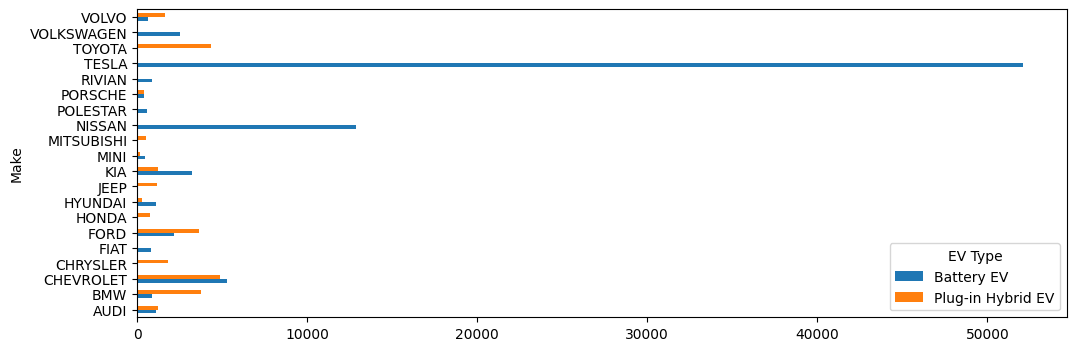

In [36]:
# top 20 'Make' v/s 'EV Type'
top_20_makes = df['Make'].value_counts().head(20).index.tolist()
tmpdf_top_20_makes = df[df['Make'].isin(top_20_makes)]
tmpdf_top_20_makes.groupby(['Make', 'EV Type']).size().unstack().plot(kind='barh', figsize=(12, 4))

<Axes: xlabel='Model Year', ylabel='Electric Range'>

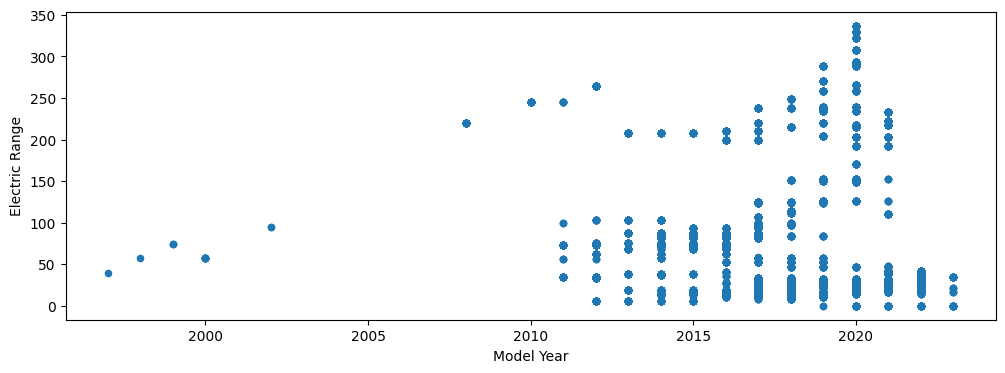

In [37]:
df.plot(x='Model Year', y='Electric Range', kind='scatter', figsize=(12, 4))

In [38]:
# Automobile company and Electric Range of EVs they provide :

fig = px.scatter(df, x='Make', y='Electric Range', title='Automobile company and Electric Range of EVs they provide :')
fig.show()

# **Task 2 - Create a Choropleth to display the number of EV vehicles based on location :-**

In [44]:
# Choropleth map to display the number of EV vehicles based on location :

def EV_choropleth(df):

    # Calculating the count of EV vehicles for each state
    EV_State = df['State'].value_counts().reset_index()
    EV_State.columns = ['State', 'EV Count']

    # Creating the Choropleth map using plotly.graph_objects
    fig_Choropleth = go.Figure(data=go.Choropleth(
        locations=EV_State['State'],
        z=EV_State['EV Count'],
        locationmode='USA-states',
        colorscale='rainbow',
        colorbar_title='Count of EV vehicles for each state',
    ))

    # Setting the Map title and layout
    fig_Choropleth.update_layout(
        title_text="Choropleth Map of 'Count of EV Vehicles by State'",
        geo_scope='usa',
    )

    return fig_Choropleth

fig = EV_choropleth(df)
fig.show()

**Washington(WA) state has highest number of Electric Vehicles usage**

# **Task 3 - Create a Racing Bar Plot to display the animation of EV Make and its count each year :**

In [55]:
df['Model Year'] = pd.to_datetime(df['Model Year'], format='%Y')

grouped_data = df.groupby(['Model Year', 'Make']).size().reset_index(name='Count')

import bar_chart_race as bcr
df_pivot_tab = grouped_data.pivot(index='Model Year', columns='Make', values='Count')

df_pivot_tab = df_pivot_tab.fillna(method='pad')

# Creating the Racing Bar Plot
bcr.bar_chart_race(
    df=df_pivot_tab,
    orientation='h',
    sort='desc',
    steps_per_period=10,
    n_bars=10,
    fixed_max=True,
    title='EV Make Racing Bar Plot by Year',
    label_bars=True,
    period_length=1000,
    filter_column_colors=True
)